# Fresnel Equations (by Wolfram Language)

#### define the `Fresnel` function

In [1]:
Fresnel[n1_,n2_][θi_][vectorMagnitude_][showS_,showP_][azimuthal_,elevation_] := Module[
    {
        θt, θb, θc, totalReflection,
        Sr,St, Svectors,
        Pr,Pt, Pvectors,
        range = 2, plotColor = ColorData[68,"ColorList"],
        table, fig
    },
    
    (* angles *)
    θt = ArcSin[n1/n2 Sin@θi];
    θb = ArcTan[n1,n2]; (* Brewster angle *)
    θc = ArcSin[n2/n1]; (* critical angle of total internal reflection *)
    totalReflection = If[n1<=n2, False, θi>θc];
    
    (* complex reflection coefficients *)
    Sr = (n1 Cos@θi - n2 Cos@θt) / (n1 Cos@θi + n2 Cos@θt) //AbsArg;
    Pr = (n2 Cos@θi - n1 Cos@θt) / (n2 Cos@θi + n1 Cos@θt) //AbsArg;
    (* transmission coefficients *)
    St = 2n1 Cos@θi              / (n1 Cos@θi + n2 Cos@θt);
    Pt = 2n1 Cos@θi              / (n2 Cos@θi + n1 Cos@θt);
    (* intensity and power *)
    If[vectorMagnitude=="Intensity",
        Sr[[1]] = Sr[[1]]^2; St = n2/n1 St^2;
        Pr[[1]] = Pr[[1]]^2; Pt = n2/n1 Pt^2
    ];
    If[vectorMagnitude=="Power",
        Sr[[1]] = Sr[[1]]^2; St = Cos@θt/Cos@θi n2/n1 St^2 //If[St==0,St,#]&;
        Pr[[1]] = Pr[[1]]^2; Pt = Cos@θt/Cos@θi n2/n1 Pt^2 //If[Pt==0,Pt,#]&
        (* examine if St,Pt==0 to avoid cos(90°)==0 *)
    ];
    
    (* table of parameters *)
    table = Column@{
        Row@{Subscript["n",1],"=",n1, Spacer@20, Subscript["n",2],"=",n2},
        Row@{Subscript["θ","b"],"=",θb/Degree//Round[#,0.01]&, Spacer@20, Subscript["θ","c"],"=",θc/Degree//Round[#,0.01]&},
        TableForm[
            {
                { θi/Degree//Round[#,0.01]&, θi/Degree//Round[#,0.01]&, θt/Degree//Round[#,0.01]& },
                { 1, Row@{Sr[[1]]//Round[#,0.01]&,"∠",Sr[[2]]/Degree//Round[#,0.01]&}, If[totalReflection, "evanescent", St//Round[#,0.01]&] },
                { 1, Row@{Pr[[1]]//Round[#,0.01]&,"∠",Pr[[2]]/Degree//Round[#,0.01]&}, If[totalReflection, "evanescent", Pt//Round[#,0.01]&] }
            },
            TableHeadings->{
                {"angle","S("<>vectorMagnitude<>")","P("<>vectorMagnitude<>")"},
                {"incident","reflected","transmitted"}
            },
            TableAlignments->{Center,Automatic}
        ]
    };
    
    (* points to draw light vectors *)
    iPoint = range/2 {-Sin@θi,0, Cos@θi};
    rPoint = range/2 { Sin@θi,0, Cos@θi};
    tPoint = range/2 { Sin@θt,0,-Cos@θt};
    (* plots of light vectors *)
    (* represent phase shift of reflected light by a counterclockwise rotation of the light vetors *)
    Svectors = Graphics3D@{
        plotColor[[1]], Thickness@Large, Line@{
            { iPoint, iPoint +                      {0,-1,0}                                   },
            { rPoint, rPoint + Sr[[1]] ( Cos@Sr[[2]]{0,-1,0} + Sin@Sr[[2]]{Cos@θi,0,-Sin@θi} ) },
            { tPoint, tPoint + St                   {0,-1,0}                                   }
            //If[totalReflection, Nothing, #]&
        }
    };
    Pvectors = Graphics3D@{
        plotColor[[2]], Thickness@Large, Line@{
            { iPoint, iPoint +                      { Cos@θi,0,Sin@θi}                         },
            { rPoint, rPoint + Pr[[1]] ( Cos@Pr[[2]]{-Cos@θi,0,Sin@θi} + Sin@Pr[[2]]{0,-1,0} ) },
            { tPoint, tPoint + Pt                   { Cos@θt,0,Sin@θt}                         }
            //If[totalReflection, Nothing, #]&
        }
    };
    
    (* combining the plots into a single figure *)
    fig = Show[
        {
            Graphics3D@{
                (* interface of medium *)
                Gray, Line@{ 
                    { {-range,0,0}, {range,0,0} },
                    { {0,-range,0}, {0,range,0} }
                },
                (* light beams *)
                Darker@plotColor[[4]], Line@{ {0,0,0}, 2iPoint },
                plotColor[[4]], Line@{
                    { {0,0,0}, 2rPoint },
                    { {0,0,0}, 2tPoint }
                    //If[totalReflection, Nothing, #]&
                },
                (* normal line *)
                Gray, Dashed, Line@{ {0,0,-range}, {0,0,range} }
            },
            If[showS, Svectors, Nothing],
            If[showP, Pvectors, Nothing]
        },
        PlotRange->{{-range,range},{-range,range},{-range,range}},
        Boxed->False, BoxRatios->{1,1,1},
        ViewPoint->CoordinateTransform["Spherical"->"Cartesian",
            {10,(90-elevation)Degree,(azimuthal-90)Degree}],
        ImageSize->Medium
    ];
    
    Column@{ table, fig }
]

#### plot a static figure

n =1Spacer[20]n =1.5
 1             2
θ =56.31Spacer[20]θ =90. - 55.14 I
 b                 c
           incident   reflected   transmitted
angle      40.        40.         25.37

S(Power)   1          0.08∠180.   0.92

P(Power)   1          0.01∠0.     0.99
-Graphics3D-
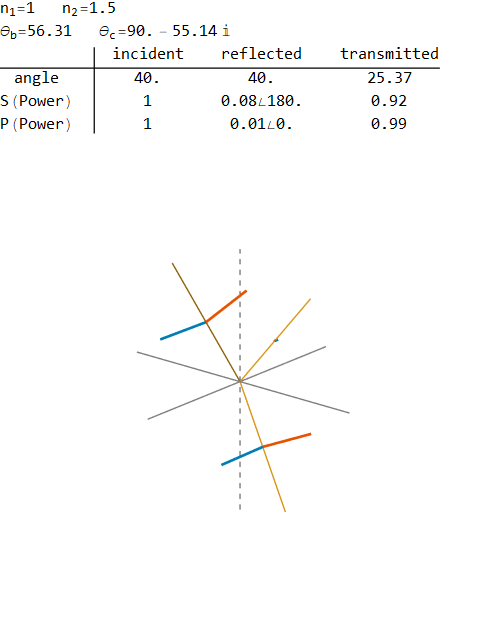

In [2]:
Fresnel[1,1.5][40Degree]["Power"][True,True][40,20]

#### create an interactive interface (export a CDF file)

In [ ]:
Export[
    FileNameJoin@{Directory[],"Fresnel.cdf"},
    Notebook[{Cell[BoxData@ToBoxes@#,"Output"]}, WindowSize->All],
    "CDF"
]& @
Manipulate[
    Fresnel[n1,n2][θi Degree][vectorMagnitude][showS,showP][40,20],
    
    {{n1,   1, Subscript["n",1]}, 1,2,0.1},
    {{n2, 1.5, Subscript["n",2]}, 1,2,0.1},
    {{θi,   0, Subscript["θ",i]}, 0,90,1 },
    {{vectorMagnitude, "Power", "vector amplitude"}, {"Amplitude","Intensity","Power"}},
    {{showS, True, "show S light"}, {True,False}},
    {{showP, True, "show P light"}, {True,False}},
    TrackedSymbols->{n1,n2, θi, vectorMagnitude, showS,showP},
    
    ControlPlacement->Right,
    SaveDefinitions->True
]